In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
swiss = pd.read_csv('../data/swiss.csv').drop('Unnamed: 0', axis=1)

In [3]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
0,80.2,17.0,15,12,9.96,22.2
1,83.1,45.1,6,9,84.84,22.2
2,92.5,39.7,5,5,93.40,20.2
3,85.8,36.5,12,7,33.77,20.3
4,76.9,43.5,17,15,5.16,20.6


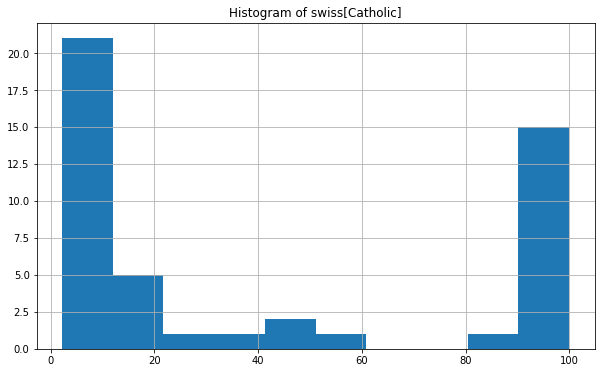

In [4]:
fig, ax = plt.subplots(figsize=(10,6))
swiss['Catholic'].hist(ax=ax)
ax.set_title('Histogram of swiss[Catholic]')
plt.show()

In [5]:
swiss['Catholic_Bin'] = np.where(swiss['Catholic'] > 50, 1, 0)

In [6]:
def plot_baseline_points(data_df):
    fig, ax = plt.subplots(figsize=(8, 6))
    data_df.query('Catholic_Bin==0').plot(x='Agriculture', 
                                        y='Fertility', 
                                        kind='scatter', 
                                        ax=ax, 
                                        color='r',
                                        label=0)
    data_df.query('Catholic_Bin==1').plot(x='Agriculture', 
                                        y='Fertility', 
                                        kind='scatter', 
                                        ax=ax, 
                                        color='b',
                                        label=1)
    return fig, ax

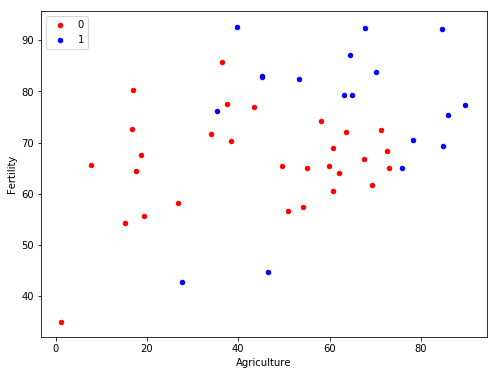

In [7]:
fig, ax = plot_baseline_points(swiss)
plt.show()

### Model not including Religion

In [8]:
lm1 = smf.ols('Fertility ~ Agriculture', data=swiss).fit()
lm1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,60.3044,4.251,14.185,0.000,51.742,68.867
Agriculture,0.1942,0.077,2.532,0.015,0.040,0.349


In [9]:
xs_to_plot_1 = swiss['Agriculture'].min(), swiss['Agriculture'].max()
ys_to_plot_1 = lm1.predict({'Agriculture': xs_to_plot_1})

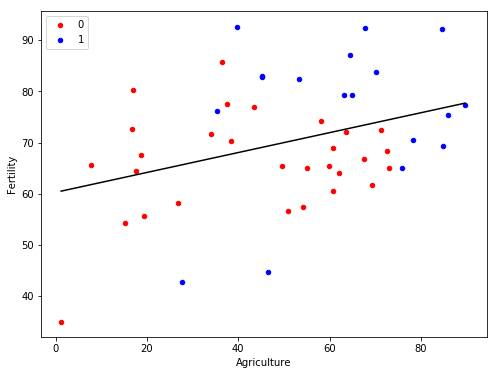

In [10]:
fig, ax = plot_baseline_points(swiss)
ax.plot(xs_to_plot_1, ys_to_plot_1, color='black')
plt.show()

### Model effectively fitting 2 different intercepts

In [11]:
lm2 = smf.ols('Fertility ~ Agriculture + Catholic_Bin', data=swiss).fit()
lm2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,60.8322,4.106,14.816,0.000,52.557,69.107
Agriculture,0.1242,0.081,1.531,0.133,-0.039,0.288
Catholic_Bin,7.8843,3.748,2.103,0.041,0.330,15.439


In [12]:
xs_to_plot_2 = swiss['Agriculture'].min(), swiss['Agriculture'].max()
xs_to_plot_2_1 = {'Agriculture': xs_to_plot_2, 'Catholic_Bin': [0, 0]}
xs_to_plot_2_2 = {'Agriculture': xs_to_plot_2, 'Catholic_Bin': [1, 1]}

ys_to_plot_2_1 = lm2.predict(xs_to_plot_2_1)
ys_to_plot_2_2 = lm2.predict(xs_to_plot_2_2)

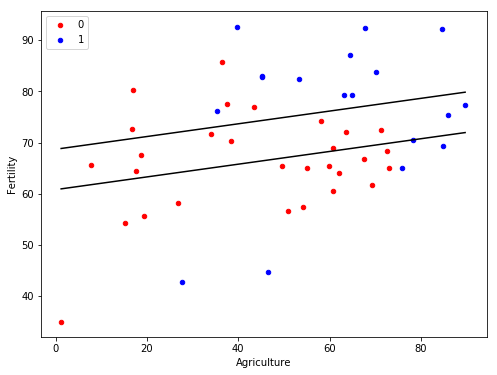

In [13]:
fig, ax = plot_baseline_points(swiss)
ax.plot(xs_to_plot_2, ys_to_plot_2_1, color='black')
ax.plot(xs_to_plot_2, ys_to_plot_2_2, color='black')
plt.show()

### Model effectively fitting 2 lines

In [14]:
lm3 = smf.ols('Fertility ~ Agriculture * Catholic_Bin', data=swiss).fit()
lm3.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,62.0499,4.789,12.956,0.000,52.392,71.708
Agriculture,0.0961,0.099,0.973,0.336,-0.103,0.295
Catholic_Bin,2.8577,10.626,0.269,0.789,-18.573,24.288
Agriculture:Catholic_Bin,0.0891,0.176,0.506,0.615,-0.266,0.444


In [15]:
xs_to_plot_3 = swiss['Agriculture'].min(), swiss['Agriculture'].max()
xs_to_plot_3_1 = {'Agriculture': xs_to_plot_3, 'Catholic_Bin': [0, 0]}
xs_to_plot_3_2 = {'Agriculture': xs_to_plot_3, 'Catholic_Bin': [1, 1]}

ys_to_plot_3_1 = lm3.predict(xs_to_plot_3_1)
ys_to_plot_3_2 = lm3.predict(xs_to_plot_3_2)

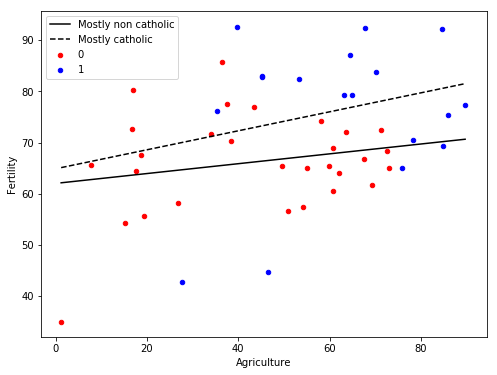

In [16]:
fig, ax = plot_baseline_points(swiss)
ax.plot(xs_to_plot_3, ys_to_plot_3_1, color='black', label='Mostly non catholic')
ax.plot(xs_to_plot_3, ys_to_plot_3_2, color='black', ls='--', label='Mostly catholic')
ax.legend()
plt.show()